# Try different models (SVC, LDA, QDA, LogReg)

**Initial edit:** *Lukas Vlcek, 2019-03-07*

* Explore different types of models using cross-validation

## Setup

In [1]:
# Notebook settings

# code development settings (automatically reload modified modules)
%load_ext autoreload
%autoreload 2

# plotting backend
%matplotlib inline

In [2]:
# basic libraries
import os

# ML
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model.logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
 |  entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It can handle
 |  both dense and sparse input. Use C-ordered arrays or CSR matrices
 |  containing 64-bit floats for optimal performance; any other input format
 |  will be converted (and copied).
 |  
 |  The 'newton-cg', 'sag', and 'lbfgs' solve

In [16]:
# project directories
data_raw = '../data/raw'
data_interim = '../data/interim'
data_processed = '../data/processed'
reports_dir = '../reports'
src_dir = '../src'

## Read data

In [17]:
# import CSV (which was exported from Excel), in need for a serious cleanup
df_xy = pd.read_csv(os.path.join(data_interim, 'alloys_model_ready.csv'))

In [18]:
df_xy.lattice = df_xy.lattice.astype('category')
df_xy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 8 columns):
density    355 non-null float64
DH_mix     355 non-null float64
DS_mix     355 non-null float64
T_m        355 non-null float64
delta      355 non-null float64
D_elneg    355 non-null float64
VEC        355 non-null float64
lattice    355 non-null category
dtypes: category(1), float64(7)
memory usage: 20.0 KB


In [19]:
df_xy.head()

,density,DH_mix,DS_mix,T_m,delta,D_elneg,VEC,lattice
0,14.88,-6.0,5.76,1286.13,0.35,0.31,11.0,FCC
1,8.37,-1.0,5.76,1789.50,0.79,0.03,8.5,FCC
2,8.90,0.0,5.76,1748.00,0.00,0.02,9.5,FCC
3,8.91,4.0,5.76,1542.88,1.19,0.01,10.5,FCC
4,8.37,-2.0,5.76,1769.50,0.79,0.04,9.0,FCC


## Prepare data for simple modeling

**For this exploration, simply drop rows with missing data**

In [20]:
cols = list(df_xy.columns)
cols.remove('lattice')

In [21]:
X = df_xy[cols].values
y = df_xy['lattice'].cat.codes.values

In [22]:
df_xy['lattice'].cat.codes.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3,

In [23]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)#, random_state=42)

**Support Vector Classifier**

In [24]:
#lin_svc = LinearSVC(random_state=0, tol=1e-5)
svc = SVC(random_state=0, tol=1e-5)
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=1e-05, verbose=False)

In [25]:
print('Accuracy on the training data:', svc.score(X_train, y_train))
print('Accuracy on the testing data:', svc.score(X_test, y_test))

Accuracy on the training data: 0.9964788732394366
Accuracy on the testing data: 0.5774647887323944


In [26]:
param_grid = {
        'C':list(np.logspace(0.01, 3, 20)),
        'gamma':list(np.logspace(0.01, 3, 20))
}
grid = GridSearchCV(svc, param_grid=param_grid, cv=5)

In [27]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=1e-05, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1.023292992280754, 1.4701729270983068, 2.1122087729296126, 3.0346266199081597, 4.359871448447063, 6.263860905418131, 8.999337229633468, 12.92941714312553, 18.57579323847129, 26.687985283381586, 38.34283410362761, 55.08744521130167, 79.14455701700615, 113.70759492279107, 163.3645778...57781104687, 234.70714776355152, 337.20556775176635, 484.46583756086665, 696.0358019246328, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [28]:
# Identify optimal parameters
mean_scores = np.array(grid.cv_results_['mean_test_score']).reshape(20,20)
print('Maximum score:', mean_scores.max())

Maximum score: 0.6267605633802817


In [29]:
#print(mean_scores)
best_index = np.unravel_index(np.argmax(mean_scores, axis=None), mean_scores.shape)
print('Best hyperparameters:')
grid_list = sorted(param_grid)
#print(grid_list)
#print(best_index)
for i, j in enumerate(best_index):
    print(' ', grid_list[i],':', param_grid[grid_list[i]][j])

Best hyperparameters:
  C : 1.023292992280754
  gamma : 1.023292992280754


In [30]:
print('Accuracy on the training data:', grid.score(X_train, y_train))
print('Accuracy on the testing data:', grid.score(X_test, y_test))

Accuracy on the training data: 1.0
Accuracy on the testing data: 0.5492957746478874


In [69]:
X_pred = grid.predict(X)
df_out = df_xy.assign(pred=X_pred)
df_out = df_out.assign(orig=y)

# red_cols = list(df_out.columns)
# red_cols.remove('lattice')
# red_cols.remove('orig')

df_out.pred = df_out.pred.astype('category')
df_out.pred = df_out.pred.cat.rename_categories({1:'FCC', 0:'BCC', 2:'HCP', 4:'multi-phase', 3:'amorphous'})

df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 10 columns):
density    355 non-null float64
DH_mix     355 non-null float64
DS_mix     355 non-null float64
T_m        355 non-null float64
delta      355 non-null float64
D_elneg    355 non-null float64
VEC        355 non-null float64
lattice    355 non-null category
pred       355 non-null category
orig       355 non-null int8
dtypes: category(2), float64(7), int8(1)
memory usage: 20.9 KB


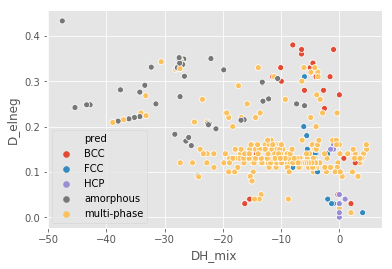

In [70]:
plt.style.use('ggplot')
sns.scatterplot(x='DH_mix', y='D_elneg', hue='pred', data=df_out)

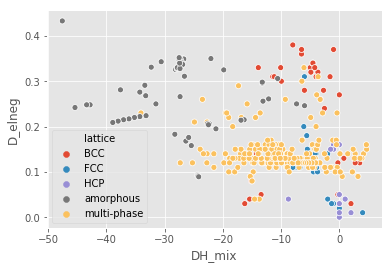

In [35]:
 sns.scatterplot(x='DH_mix', y='D_elneg', hue='lattice', data=df_out)

** Linear Discriminant Analysis **

In [64]:
lda = LinearDiscriminantAnalysis(solver='lsqr')
lda.fit(X_train, y_train)
print('Accuracy on the training data:', lda.score(X_train, y_train))
print('Accuracy on the testing data:', lda.score(X_test, y_test))

Accuracy on the training data: 0.9084507042253521
Accuracy on the testing data: 0.9295774647887324


In [65]:
param_grid = {
        'shrinkage':list(np.linspace(0.0, 1, 20)),
}
grid_lda = GridSearchCV(lda, param_grid=param_grid, cv=5)
grid_lda.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='lsqr', store_covariance=False, tol=0.0001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'shrinkage': [0.0, 0.05263157894736842, 0.10526315789473684, 0.15789473684210525, 0.21052631578947367, 0.2631578947368421, 0.3157894736842105, 0.3684210526315789, 0.42105263157894735, 0.47368421052631576, 0.5263157894736842, 0.5789473684210527, 0.631578947368421, 0.6842105263157894, 0.7368421052631579, 0.7894736842105263, 0.8421052631578947, 0.894736842105263, 0.9473684210526315, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [68]:
print('Accuracy on the training data:', grid_lda.score(X_train, y_train))
print('Accuracy on the testing data:', grid_lda.score(X_test, y_test))

# Identify optimal parameters
mean_scores = np.array(grid_lda.cv_results_['mean_test_score'])#.reshape(20)
print('Maximum score:', mean_scores.max())
print(mean_scores)
best_index = np.unravel_index(np.argmax(mean_scores, axis=None), mean_scores.shape)
print('Best hyperparameters:')
grid_list = sorted(param_grid)
#print(grid_list)
#print(best_index)
for i, j in enumerate(best_index):
    print(' ', grid_list[i],':', param_grid[grid_list[i]][j])

Accuracy on the training data: 0.9084507042253521
Accuracy on the testing data: 0.9295774647887324
Maximum score: 0.9084507042253521
[0.9084507  0.70422535 0.70774648 0.71478873 0.72183099 0.72887324
 0.74295775 0.73943662 0.73943662 0.73591549 0.72535211 0.72183099
 0.72887324 0.72887324 0.72887324 0.71478873 0.71478873 0.69366197
 0.68309859 0.66901408]
Best hyperparameters:
  shrinkage : 0.0


** Quadratic discriminant analysis **

In [44]:
qda = QuadraticDiscriminantAnalysis()

In [45]:
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [46]:
print('Accuracy on the training data:', qda.score(X_train, y_train))
print('Accuracy on the testing data:', qda.score(X_test, y_test))

Accuracy on the training data: 0.9471830985915493
Accuracy on the testing data: 0.9295774647887324


In [47]:
param_grid_qda = {
        'reg_param':list(np.linspace(0.0, 1.0, 100)),
}
grid_qda = GridSearchCV(qda, param_grid=param_grid_qda, cv=5)

In [48]:
grid_qda.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'reg_param': [0.0, 0.010101010101010102, 0.020202020202020204, 0.030303030303030304, 0.04040404040404041, 0.05050505050505051, 0.06060606060606061, 0.07070707070707072, 0.08080808080808081, 0.09090909090909091, 0.10101010101010102, 0.11111111111111112, 0.12121212121212122, 0.131313131313...494949494949496, 0.9595959595959597, 0.9696969696969697, 0.9797979797979799, 0.98989898989899, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [49]:
# Identify optimal parameters
mean_scores_qda = np.array(grid_qda.cv_results_['mean_test_score'])#.reshape(20)
print('Maximum score:', mean_scores_qda.max())

Maximum score: 0.9190140845070423


In [50]:
print('Accuracy on the training data:', grid_qda.score(X_train, y_train))
print('Accuracy on the testing data:', grid_qda.score(X_test, y_test))

Accuracy on the training data: 0.9507042253521126
Accuracy on the testing data: 0.9295774647887324


In [52]:
#print(mean_scores)
best_index = np.unravel_index(np.argmax(mean_scores_qda, axis=None), mean_scores.shape)
print('Best hyperparameters:')
grid_list_qda = sorted(param_grid_qda)
#print(grid_list)
#print(best_index)
for i, j in enumerate(best_index):
    print(' ', grid_list_qda[i],':', param_grid_qda[grid_list_qda[i]][j])

Best hyperparameters:
  reg_param : 0.030303030303030304


** Logistic Regression **

In [53]:
lreg = LogisticRegression(solver='lbfgs')

In [54]:
lreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
print('Accuracy on the training data:', lreg.score(X_train, y_train))
print('Accuracy on the testing data:', lreg.score(X_test, y_test))

Accuracy on the training data: 0.9119718309859155
Accuracy on the testing data: 0.9154929577464789


In [56]:
param_grid_lreg = {
        'multi_class':['multinomial', 'ovr'],
        'C':list(np.logspace(0.001, 1, 20)),
        #'penalty':['l1','l2']
}
grid_lreg = GridSearchCV(lreg, param_grid=param_grid_lreg, cv=5)

In [57]:
grid_lreg.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'multi_class': ['multinomial', 'ovr'], 'C': [1.0023052380778996, 1.1313030223382303, 1.2769029630194788, 1.4412417758753702, 1.62673117432237, 1.8360932619407149, 2.0724004800291698, 2.33912069645393, 2.640168097481866, 2.9799606294485637, 3.3634848332320897, 3.7963690229946954, 4.28496588310889, 4.836445695398564, 5.458901564828371, 6.16146818785482, 6.954455906394521, 7.849502014685275, 8.85974153950626, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [58]:
print('Accuracy on the training data:', grid_lreg.score(X_train, y_train))
print('Accuracy on the testing data:', grid_lreg.score(X_test, y_test))

Accuracy on the training data: 0.9119718309859155
Accuracy on the testing data: 0.9154929577464789


In [59]:
# Identify optimal parameters
mean_scores_lreg = np.array(grid_lreg.cv_results_['mean_test_score']).reshape(20,2)
print('Maximum score:', mean_scores_lreg.max())

Maximum score: 0.9049295774647887


In [60]:
#print(mean_scores)
best_index = np.unravel_index(np.argmax(mean_scores_lreg, axis=None), mean_scores_lreg.shape)
print('Best hyperparameters:')
grid_list_lreg = sorted(param_grid_lreg)
#print(grid_list)
#print(best_index)
for i, j in enumerate(best_index):
    print(' ', grid_list_lreg[i],':', param_grid_lreg[grid_list_lreg[i]][j])

Best hyperparameters:
  C : 10.0
  multi_class : ovr


In [61]:
y_pred = grid_lreg.predict(X)
df_out_lr = df_xy.assign(pred=y_pred)
df_out_lr = df_out_lr.assign(orig=y)

red_cols = list(df_out_lr.columns)
red_cols.remove('lattice')
red_cols.remove('orig')

df_out_lr.pred = df_out_lr.pred.astype('category')
df_out_lr.pred = df_out_lr.pred.cat.rename_categories({1:'FCC', 0:'BCC', 2:'HCP', 4:'multi-phase', 3:'amorphous'})

df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 10 columns):
density    355 non-null float64
DH_mix     355 non-null float64
DS_mix     355 non-null float64
T_m        355 non-null float64
delta      355 non-null float64
D_elneg    355 non-null float64
VEC        355 non-null float64
lattice    355 non-null category
pred       355 non-null category
orig       355 non-null int8
dtypes: category(2), float64(7), int8(1)
memory usage: 20.9 KB


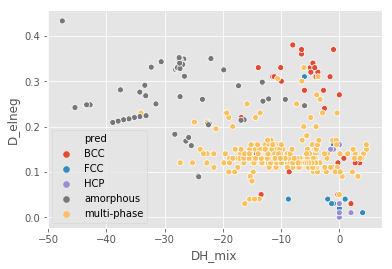

In [62]:
sns.scatterplot(x='DH_mix', y='D_elneg', hue='pred', data=df_out_lr)

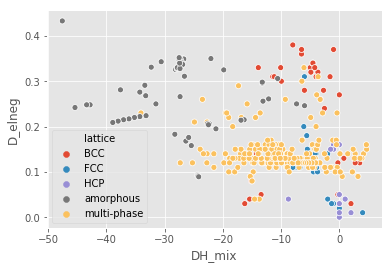

In [63]:
sns.scatterplot(x='DH_mix', y='D_elneg', hue='lattice', data=df_out)